In [72]:
import pickle
import numpy as np
from sklearn.utils import shuffle

d = pickle.load(open('train_data.p', 'rb'))
train_x = np.array(d['train_x'], dtype=np.float32)
train_y = np.array(d['train_y'])

#train_y[train_y == -1] = 100

train_x, train_y = shuffle(train_x, train_y)
train_x = train_x - 128
train_x = train_x / 128

print('Loaded.')

Loaded.


In [73]:
print(train_x.shape, train_y.shape)

(25000, 32, 32, 3) (25000,)


1 -1 1 1
0.992188 -1.0


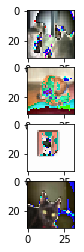

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

print(train_y[500], train_y[501], train_y[502], train_y[503])
print (np.max(train_x), np.min(train_x))

plt.subplot(411)
plt.imshow(train_x[500])
plt.subplot(412)
plt.imshow(train_x[501])
plt.subplot(413)
plt.imshow(train_x[502])
plt.subplot(414)
plt.imshow(train_x[503])



In [81]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(2))
model.add(Activation('softmax'))


In [108]:
from sklearn.preprocessing import LabelBinarizer
nt = 5000
validation_size = 500

xt = train_x[0:nt]
yt = train_y[0:nt]

xv = train_x[-validation_size:]
yv = train_y[-validation_size:]

lb = LabelBinarizer()
yt_one_hot = lb.fit_transform(yt)
yv_one_hot = lb.fit_transform(yv)


print (xt.shape, yt.shape, xv.shape, yv.shape)
print(yt_one_hot)



(5000, 32, 32, 3) (5000,) (500, 32, 32, 3) (500,)
[[0]
 [0]
 [1]
 ..., 
 [1]
 [1]
 [0]]


In [109]:
model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
history = model.fit(xt, yt_one_hot, nb_epoch=10, validation_split=0.2)


Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s - loss: 0.6866 - acc: 0.6020 - val_loss: 0.7224 - val_acc: 0.5870

In [ ]:
v = model.evaluate()

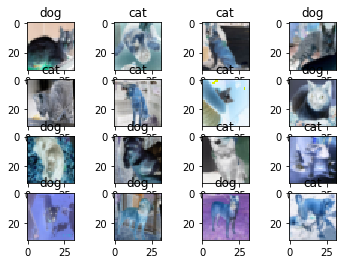

In [107]:
import random
test_l = 20
test_vis = []
for n in range(test_l):
    test_vis.append(xv[random.randint(0, 500)])

test_vis = np.array(test_vis)
preds = np.argmax(model.predict(test_vis), axis=1)

test_vis = test_vis * 128
test_vis = test_vis + 128

f, g = plt.subplots(4,4)
for i in range(4):
    for c in range(4):
        n = i*4+c
        g[i,c].imshow(test_vis[n])
        if preds[n] == 1 : title = 'cat'
        else : title = 'dog'
        g[i,c].set_title(title)
        

